In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import labelencoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # used for handling missing data

# Load data

In [9]:
df = pd.read_excel("satisfaction.xlsx")

In [10]:
df.head(1)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [11]:
df.shape

(129880, 24)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
satisfaction_v2                      129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64

# Data Understanding

In [13]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [14]:
df.satisfaction_v2.unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [15]:
df.satisfaction_v2.describe()

count        129880
unique            2
top       satisfied
freq          71087
Name: satisfaction_v2, dtype: object

In [16]:
df.describe(include="O")

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [17]:
df["Arrival Delay in Minutes"].isnull().any()

True

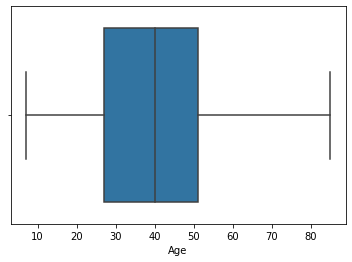

In [18]:
sns.boxplot(df["Age"])
plt.show()

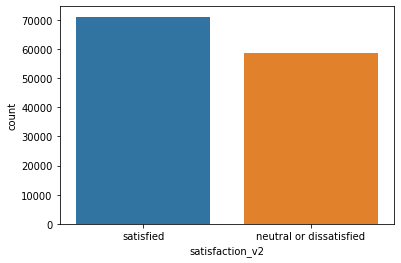

In [19]:
sns.countplot("satisfaction_v2", data = df)

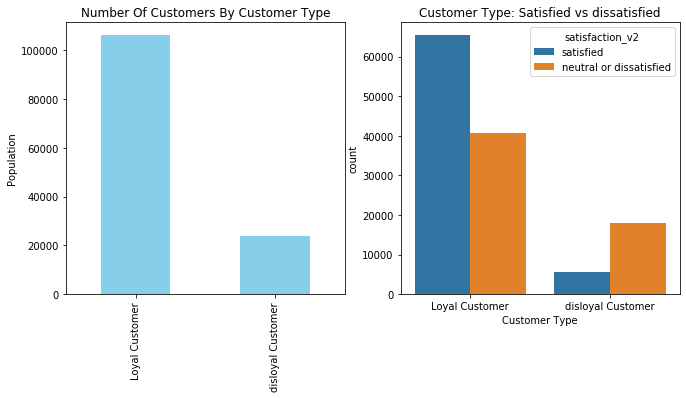

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (11, 5))
df["Customer Type"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Customers By Customer Type")
ax[0].set_ylabel("Population")
sns.countplot("Customer Type", hue = "satisfaction_v2", data = df, ax = ax[1])
ax[1].set_title("Customer Type: Satisfied vs dissatisfied")
plt.show()

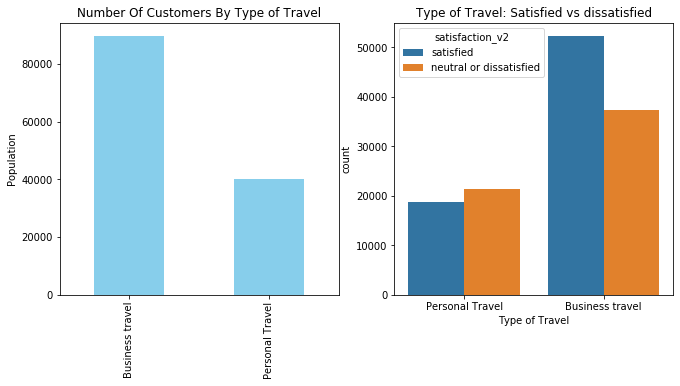

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (11, 5))
df["Type of Travel"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Customers By Type of Travel")
ax[0].set_ylabel("Population")
sns.countplot("Type of Travel", hue = "satisfaction_v2", data = df, ax = ax[1])
ax[1].set_title("Type of Travel: Satisfied vs dissatisfied")
plt.show()

In [22]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [23]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df["satisfaction_v2"] = le.fit_transform(df["satisfaction_v2"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


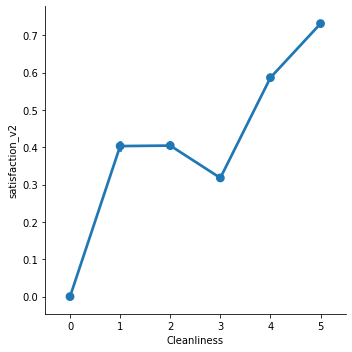

In [24]:
sns.factorplot("Cleanliness", "satisfaction_v2", data = df)

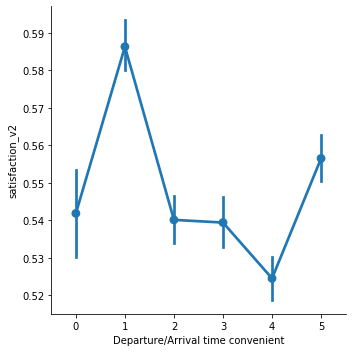

In [25]:
sns.factorplot("Departure/Arrival time convenient", "satisfaction_v2", data = df)

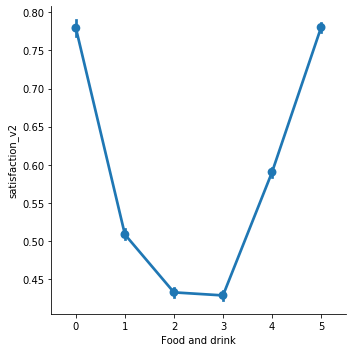

In [26]:
sns.factorplot("Food and drink", "satisfaction_v2", data = df)

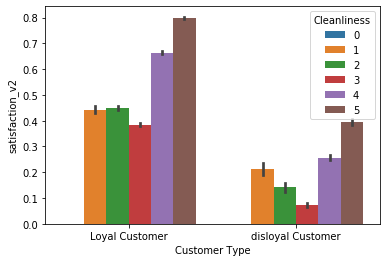

In [27]:
sns.barplot(x = "Customer Type", y = "satisfaction_v2", hue = "Cleanliness", data = df)
plt.show()

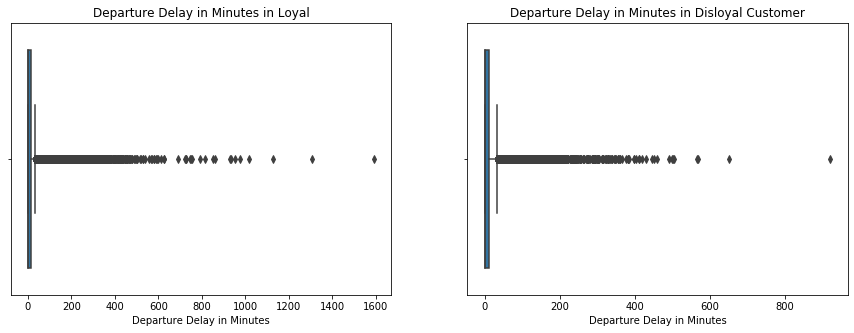

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(df[df["Customer Type"] == "Loyal Customer"]["Departure Delay in Minutes"], ax = ax[0])
ax[0].set_title("Departure Delay in Minutes in Loyal")
sns.boxplot(df[df["Customer Type"] == "disloyal Customer"]["Departure Delay in Minutes"], ax = ax[1])
ax[1].set_title("Departure Delay in Minutes in Disloyal Customer")

plt.show()

# Data preprocessing

### By doing a stratified split we keep the same proportion between classes. This split better represent the original data and will possibli reduce any bias.

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['satisfaction_v2']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

## Label Encoding

In [30]:
categorical_features = df.describe(include="O").columns.tolist()
df[categorical_features].head(3)

,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco


In [31]:
categorical_features = strat_train_set.describe(include="O").columns.tolist()
print(categorical_features)

# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical features 
strat_train_set[categorical_features] = strat_train_set[categorical_features].apply(lambda col: le.fit_transform(col))
strat_train_set[categorical_features].head(3)

['Gender', 'Customer Type', 'Type of Travel', 'Class']


,Gender,Customer Type,Type of Travel,Class
43835,0,1,0,1
46917,1,1,0,1
82684,1,0,0,1


### Handling the missing data

In [32]:
df["Arrival Delay in Minutes"].isnull().any()

True

In [33]:
strat_train_set["Arrival Delay in Minutes"].mean()

15.099801112226771

In [34]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
imputer = SimpleImputer(missing_values=float('nan'), strategy='mean')
imputer = imputer.fit(strat_train_set[["Arrival Delay in Minutes"]])
strat_train_set["Arrival Delay in Minutes"] = imputer.transform(strat_train_set[["Arrival Delay in Minutes"]])

### Drop id column

In [35]:
strat_train_set = strat_train_set.drop("id",axis=1)

In [36]:
X = strat_train_set.drop("satisfaction_v2", axis=1)
y = strat_train_set['satisfaction_v2']

# Normalization

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_corr = sc_X.fit_transform(X)

X = pd.DataFrame(X_train_corr, index=X.index, columns=X.columns)

In [38]:
X[X["Arrival Delay in Minutes"] != X["Arrival Delay in Minutes"]]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


## Feature selection

#### select those features that have the strongest relationship with the output variable.

/home/emna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05755178 0.05484492 0.02478069 0.03523919 0.03765443 0.02107298
 0.105813   0.02156334 0.03965444 0.02106168 0.02149034 0.20982949
 0.04191315 0.03987877 0.03550581 0.04386387 0.03213238 0.02988282
 0.04356632 0.05435414 0.0137249  0.01462157]


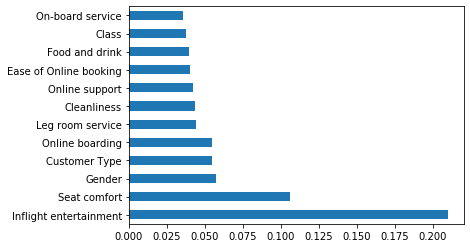

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Correlation identifies which features are most related to the target variable,.
### we will plot heatmap of correlated features using the seaborn library.

In [40]:
for_corr = pd.concat([X,y],axis=1)

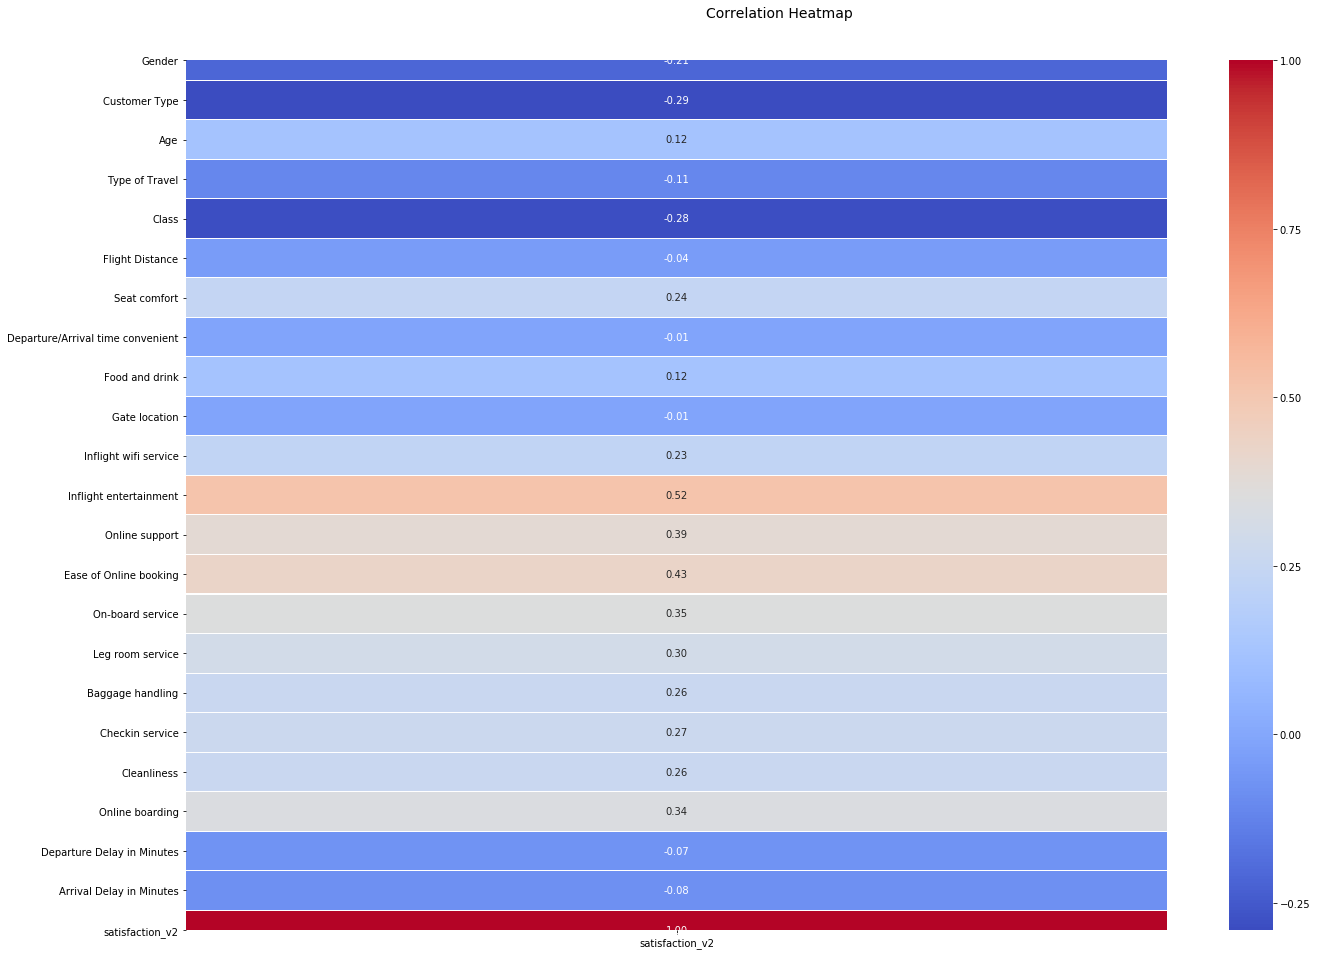

In [41]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(22, 15))
corr = for_corr.corr()
hm = sns.heatmap(round(corr[["satisfaction_v2"]],2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

#### Departure Delay in Minutes and Arrival Delay in Minutes are very positively correlated (+0.96)
#### ==> we should remove one of them

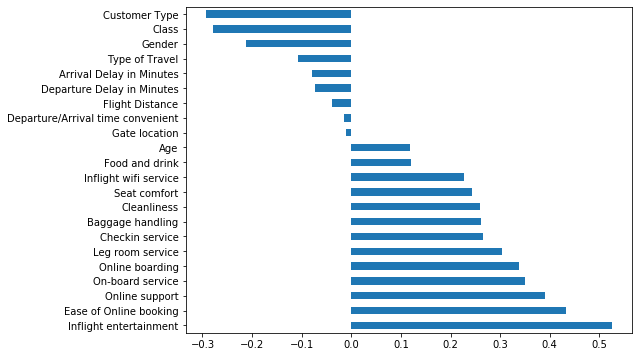

In [42]:
fig = plt.figure(figsize=(8,6))
for_corr.corr().drop("satisfaction_v2")["satisfaction_v2"].nlargest(22).plot(kind='barh')
plt.show()

In [43]:
most_correlated_feautres = for_corr.corr().abs().drop("satisfaction_v2")["satisfaction_v2"].nlargest(13).index.tolist()
most_correlated_feautres.append("Arrival Delay in Minutes") 
print(most_correlated_feautres)

['Inflight entertainment', 'Ease of Online booking', 'Online support', 'On-board service', 'Online boarding', 'Leg room service', 'Customer Type', 'Class', 'Checkin service', 'Baggage handling', 'Cleanliness', 'Seat comfort', 'Inflight wifi service', 'Arrival Delay in Minutes']


In [44]:
X = X[most_correlated_feautres]

In [45]:
X.head(1)

,Inflight entertainment,Ease of Online booking,Online support,On-board service,Online boarding,Leg room service,Customer Type,Class,Checkin service,Baggage handling,Cleanliness,Seat comfort,Inflight wifi service,Arrival Delay in Minutes
43835,-1.029358,0.40413,0.367955,-1.938423,0.499448,1.170873,2.112961,0.654836,-1.064544,-0.600037,-0.611482,-1.32072,0.569745,-0.389194


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [48]:
logisticRegr.fit(X, y)

/home/emna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Training accuracy

In [49]:
logisticRegr.score(X,y)

0.8179569602710194

In [52]:
X.head(3)

,Inflight entertainment,Ease of Online booking,Online support,On-board service,Online boarding,Leg room service,Customer Type,Class,Checkin service,Baggage handling,Cleanliness,Seat comfort,Inflight wifi service,Arrival Delay in Minutes
43835,-1.029358,0.404130,0.367955,-1.938423,0.499448,1.170873,2.112961,0.654836,-1.064544,-0.600037,-0.611482,-1.320720,0.569745,-0.389194
46917,-1.029358,-1.890488,1.132671,0.420790,-1.809272,0.397859,2.112961,0.654836,-0.271968,-0.600037,-0.611482,-0.602628,-1.703254,0.384050
82684,-0.286160,-0.360743,-0.396761,-1.938423,-0.270125,1.170873,-0.473269,0.654836,-1.857120,-0.600037,0.255422,0.115464,-0.187922,0.048977


# Test

In [55]:
strat_test_set.columns

Index(['Inflight entertainment', 'Ease of Online booking', 'Online support',
       'On-board service', 'Online boarding', 'Leg room service',
       'Customer Type', 'Class', 'Checkin service', 'Baggage handling',
       'Cleanliness', 'Seat comfort', 'Inflight wifi service',
       'Arrival Delay in Minutes', 'satisfaction_v2'],
      dtype='object')

In [54]:
most_correlated_feautres.append("satisfaction_v2")
strat_test_set = strat_test_set[most_correlated_feautres]

In [56]:
categorical_features = strat_test_set.describe(include="O").columns.tolist()
print(categorical_features)

# apply le on categorical features 
strat_test_set[categorical_features] = strat_test_set[categorical_features].apply(lambda col: le.fit_transform(col))
strat_test_set[categorical_features].head(3)

['Customer Type', 'Class']


,Customer Type,Class
63785,0,0
86893,0,0
1072,0,1


In [57]:
strat_test_set["Arrival Delay in Minutes"].isnull().any()

True

In [58]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
imputer = SimpleImputer(missing_values=float('nan'), strategy='mean')
imputer = imputer.fit(strat_test_set[["Arrival Delay in Minutes"]])
strat_test_set["Arrival Delay in Minutes"] = imputer.transform(strat_test_set[["Arrival Delay in Minutes"]])

In [59]:
X_test = strat_test_set.drop("satisfaction_v2", axis=1)
y_test = strat_test_set['satisfaction_v2']

In [102]:
predicted=list()
reality=list()
i = 10
predicted = logisticRegr.predict(X_test.iloc[:10])
reality = y_test.iloc[:10].values

In [113]:
predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [104]:
reality

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

## Testing accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [118]:
y_pred=logisticRegr.predict(X_test)

## Testing accuracy

In [119]:
accuracy_score(y_test, y_pred)

0.5789959963042809